In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

import seaborn as sns
import datetime as dt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

import time
from xgboost import XGBRegressor

In [51]:
#path="D:/University/MS/Semester 1/Tools and Techniques for Data Science/Project/research_data/"

In [52]:
cleaned_output_Chicago=pd.read_csv("iteration4.csv")
cleaned_output_Chicago.head()

,washer_dryer,parking,beds,baths,sqft,price,average_price_by_neighborhood,unit_balcony,pool,sqft_normalized,sqft_scaled,sqft_ranges
0,0,0,1,1,661.0,1842.0,2287.550000,0,1,0.391530,0.331868,4
1,0,0,1,1,854.0,2071.0,2287.550000,0,1,0.558341,0.473260,6
2,0,0,0,1,500.0,1647.0,1674.873188,0,1,0.252377,0.213919,3
3,0,0,2,2,1127.0,3045.0,3196.539326,0,1,0.794296,0.673260,7
4,0,0,0,1,500.0,1620.0,1674.873188,0,1,0.252377,0.213919,3


# Correlation 

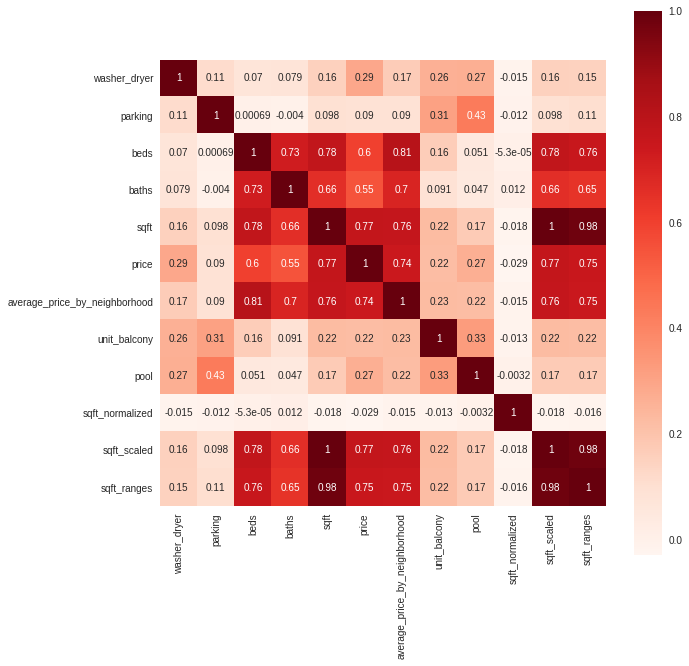

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(cleaned_output_Chicago.corr(),annot=True,square=True,cmap='Reds')
plt.show()

# Select Features

In [54]:
selected_features=['washer_dryer','parking'
                   ,'beds','baths','sqft','price',
                  'average_price_by_neighborhood']

In [55]:
cleaned_output_Chicago=cleaned_output_Chicago[selected_features]
cleaned_output_Chicago.shape

(40419, 7)

# Missing Values

In [56]:
cleaned_output_Chicago.isna().sum()

washer_dryer                     0
parking                          0
beds                             0
baths                            0
sqft                             0
price                            0
average_price_by_neighborhood    0
dtype: int64

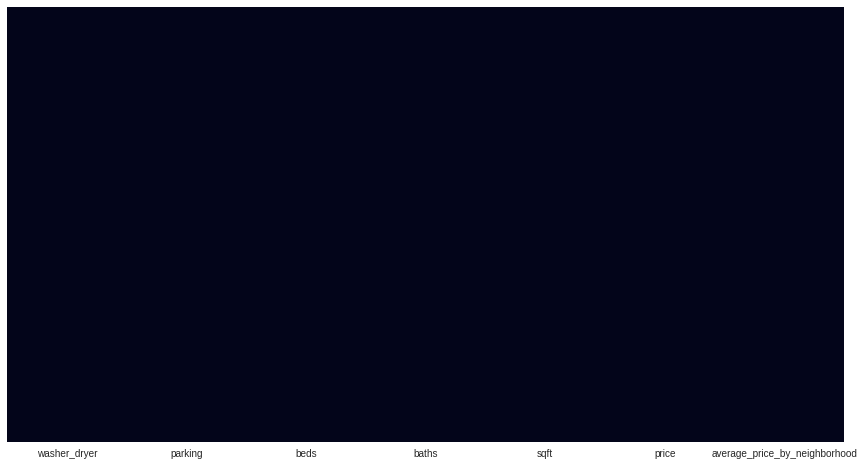

In [57]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(cleaned_output_Chicago.isnull(),yticklabels=False,cbar=False)

In [58]:
features_with_na=[features for features in cleaned_output_Chicago.columns if cleaned_output_Chicago[features].isnull().sum()>1]

In [59]:
data = cleaned_output_Chicago.copy()
for feature in features_with_na:
    #Variable that indicates 'Missing' if the observation was missing or 'Present' otherwise
    data[feature] = np.where(data[feature].isnull(), 'Missing', 'Present')
    plt.style.use("seaborn")
    #Calculate the mean/median Price where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar(color=[ 'orange', 'green'])
    plt.title(feature)
    plt.show()

# Numerical Variables

In [60]:
# list of numerical variables
numerical_features = [feature for feature in cleaned_output_Chicago.columns if cleaned_output_Chicago[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
cleaned_output_Chicago[numerical_features].head()

Number of numerical variables:  7


,washer_dryer,parking,beds,baths,sqft,price,average_price_by_neighborhood
0,0,0,1,1,661.0,1842.0,2287.550000
1,0,0,1,1,854.0,2071.0,2287.550000
2,0,0,0,1,500.0,1647.0,1674.873188
3,0,0,2,2,1127.0,3045.0,3196.539326
4,0,0,0,1,500.0,1620.0,1674.873188


## Discrete Variable

In [61]:
discrete_feature=[feature for feature in numerical_features if len(cleaned_output_Chicago[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


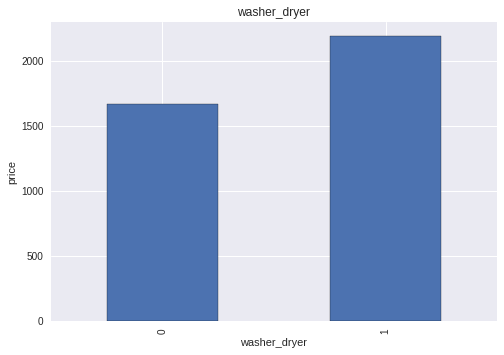

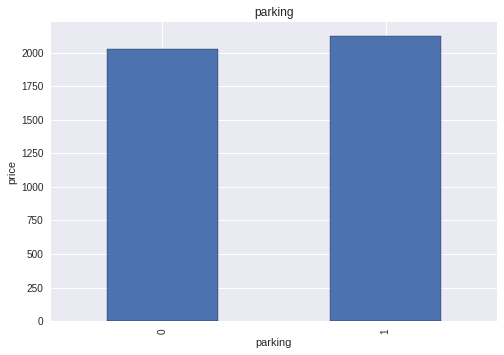

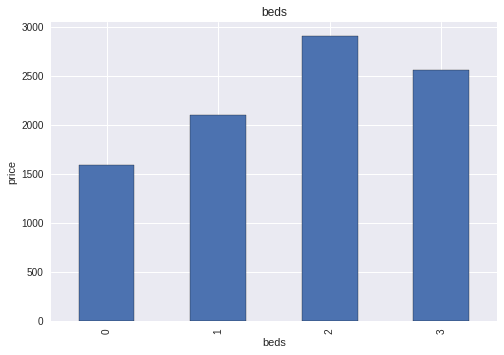

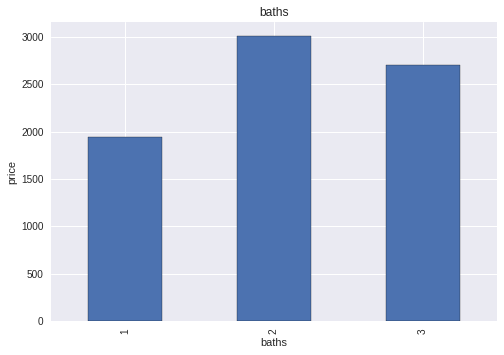

In [62]:
## Realtionship between them and Price
data=cleaned_output_Chicago.copy()
for feature in discrete_feature:
    data.groupby(feature)['price'].median().plot.bar(edgecolor='k')
    plt.style.use("seaborn")
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

## Continuous Variable

In [63]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


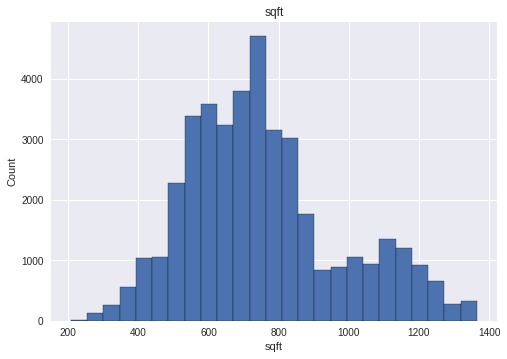

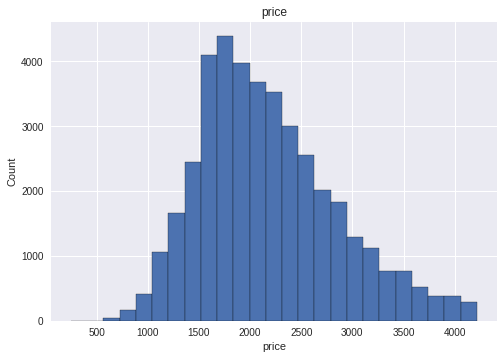

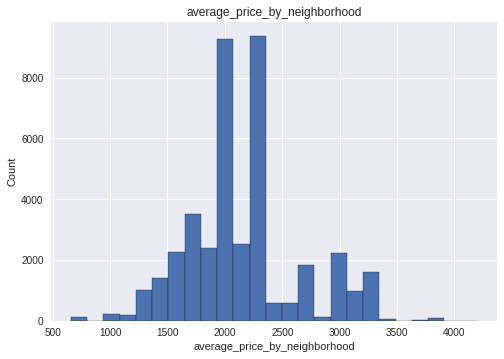

In [64]:
## Analyse the continuous values by creating histograms to understand the distribution
data=cleaned_output_Chicago.copy()
for feature in continuous_feature:
    plt.style.use("seaborn")
    data[feature].hist(bins=25,edgecolor='k')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

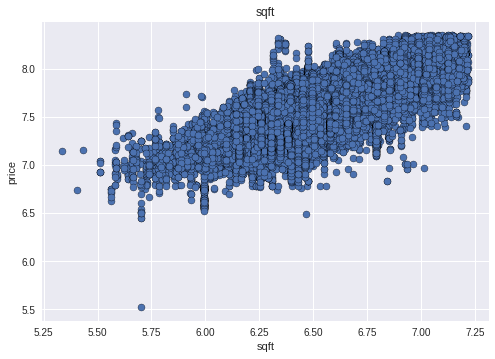

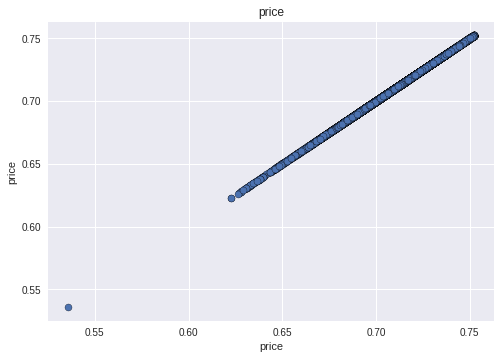

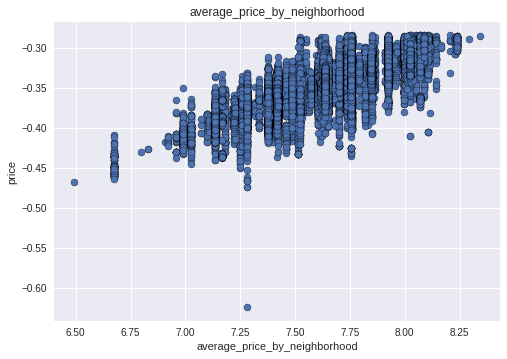

In [65]:
## We will be using logarithmic transformation
data=cleaned_output_Chicago.copy()
for feature in continuous_feature:

    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['price']=np.log(data['price'])
        plt.scatter(data[feature],data['price'],edgecolor='k')
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

## Outliers

In [66]:
def outliers_remove(df: pd.DataFrame,to_delete: pd.DataFrame):
    """Find rows containing outliers with IQR"""
    Q1 = to_delete.quantile(0.25)
    Q3 = to_delete.quantile(0.75)
    IQR = Q3 - Q1
    return df.drop(to_delete[((to_delete < (Q1 - 1.5 * IQR)) |(to_delete > (Q3 + 1.5 * IQR))).any(axis=1)].index) 

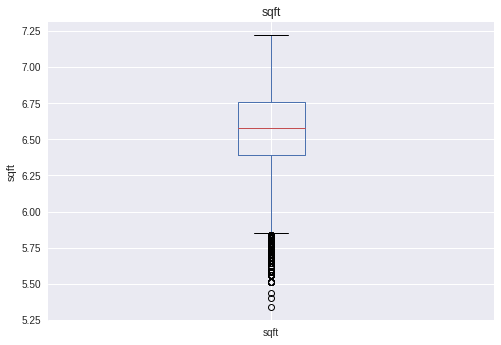

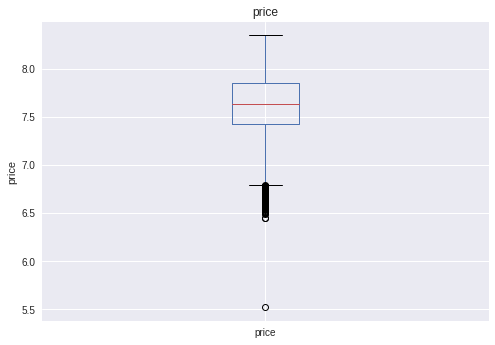

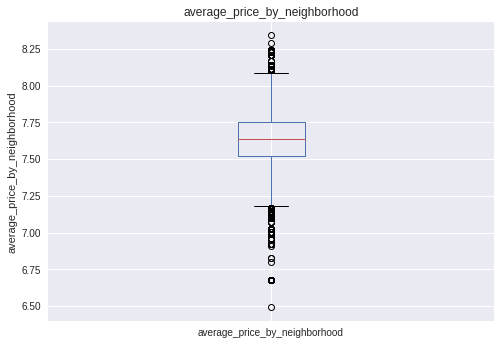

In [67]:
data=cleaned_output_Chicago.copy()
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        plt.style.use("seaborn")
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Variables

In [68]:
categorical_features=[feature for feature in cleaned_output_Chicago.columns if cleaned_output_Chicago[feature].dtypes=='O']
categorical_features

[]

In [69]:
data=cleaned_output_Chicago.copy()
for feature in categorical_features:
    plt.style.use("seaborn")
    data.groupby(feature)['price'].median().plot.bar(edgecolor='k')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [70]:
def category_onehot_multcols(multcolumns,final_df):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

# Prediciton and selecting the Algorithm

In [71]:
X=cleaned_output_Chicago.drop(['price'],axis=1,inplace=False)
Y=cleaned_output_Chicago['price']
X.shape,Y.shape

((40419, 6), (40419,))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size = 0.2, random_state = 3)

In [73]:
results=pd.DataFrame(columns=['Model','RMSE-Train','RMSE-Test','R2-Score-Train','R2-Score-Test'])  #Save RMSE for graph

## LinearRegression

In [74]:
linear_reg=linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_test_pred=linear_reg.predict(X_test)
y_train_pred=linear_reg.predict(X_train)

test_r2_score=r2_score(y_test,y_test_pred)*100
test_rmse=math.sqrt(mean_squared_error(y_test,y_test_pred))
test_acc=linear_reg.score(X_test,y_test)

train_r2_score=r2_score(y_train,y_train_pred)*100
train_rmse=math.sqrt(mean_squared_error(y_train,y_train_pred))
train_acc=linear_reg.score(X_train,y_train)


result_dist={'Model':'Linear','RMSE-Train':train_rmse,'RMSE-Test':test_rmse,'R2-Score-Train':train_r2_score,'R2-Score-Test':test_r2_score}
results=results.append(result_dist, ignore_index=True)


print("Test R2 Score           : ",test_r2_score)
print("Test RMSE               : ",test_rmse)
print("Test Accuracy Score     : ",test_acc)
print("--------------------------------------------------------")
print("Training R2 Score       : ",train_r2_score)
print("Training RMSE           : ",train_rmse)    
print("Training Accuracy Score : ",train_acc)
print("--------------------------------------------------------")

print(results)

Test R2 Score           :  68.70275544418763
Test RMSE               :  376.2933584017539
Test Accuracy Score     :  0.6870275544418762
--------------------------------------------------------
Training R2 Score       :  68.93958706185899
Training RMSE           :  374.43479785240635
Training Accuracy Score :  0.6893958706185899
--------------------------------------------------------
    Model  RMSE-Train   RMSE-Test  R2-Score-Train  R2-Score-Test
0  Linear  374.434798  376.293358       68.939587      68.702755


# Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [77]:
y_test_pred=rforest.predict(X_test)
y_train_pred=rforest.predict(X_train)

test_r2_score=r2_score(y_test,y_test_pred)*100
test_rmse=math.sqrt(mean_squared_error(y_test,y_test_pred))
test_acc=rforest.score(X_test,y_test)

train_r2_score=r2_score(y_train,y_train_pred)*100
train_rmse=math.sqrt(mean_squared_error(y_train,y_train_pred))
train_acc=rforest.score(X_train,y_train)


# result_dist={'Model':'Random Forest','RMSE-Train':train_rmse,'RMSE-Test':test_rmse,'R2-Score-Train':train_r2_score,'R2-Score-Test':test_r2_score}
# results=results.append(result_dist, ignore_index=True)


print("Test R2 Score           : ",test_r2_score)
print("Test RMSE               : ",test_rmse)
print("Test Accuracy Score     : ",test_acc)
print("--------------------------------------------------------")
print("Training R2 Score       : ",train_r2_score)
print("Training RMSE           : ",train_rmse)    
print("Training Accuracy Score : ",train_acc)
print("--------------------------------------------------------")

print(results)

Test R2 Score           :  87.70229934124923
Test RMSE               :  235.87692643484945
Test Accuracy Score     :  0.8770229934124922
--------------------------------------------------------
Training R2 Score       :  89.94477663043035
Training RMSE           :  213.043580038343
Training Accuracy Score :  0.8994477663043036
--------------------------------------------------------
    Model  RMSE-Train   RMSE-Test  R2-Score-Train  R2-Score-Test
0  Linear  374.434798  376.293358       68.939587      68.702755


# XGBoost

In [78]:
xgb = XGBRegressor(n_estimators=100)
xg_reg = xgb.fit(X_train, y_train)

[16:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [79]:
y_test_pred=xg_reg.predict(X_test)
y_train_pred=xg_reg.predict(X_train)

test_r2_score=r2_score(y_test,y_test_pred)*100
test_rmse=math.sqrt(mean_squared_error(y_test,y_test_pred))
test_acc=xg_reg.score(X_test,y_test)

train_r2_score=r2_score(y_train,y_train_pred)*100
train_rmse=math.sqrt(mean_squared_error(y_train,y_train_pred))
train_acc=xg_reg.score(X_train,y_train)


result_dist={'Model':'XGBoost','RMSE-Train':train_rmse,'RMSE-Test':test_rmse,'R2-Score-Train':train_r2_score,'R2-Score-Test':test_r2_score}
results=results.append(result_dist, ignore_index=True)


print("Test R2 Score           : ",test_r2_score)
print("Test RMSE               : ",test_rmse)
print("Test Accuracy Score     : ",test_acc)
print("--------------------------------------------------------")
print("Training R2 Score       : ",train_r2_score)
print("Training RMSE           : ",train_rmse)    
print("Training Accuracy Score : ",train_acc)
print("--------------------------------------------------------")

print(results)

Test R2 Score           :  73.33370878716514
Test RMSE               :  347.3400081349135
Test Accuracy Score     :  0.7333370878716514
--------------------------------------------------------
Training R2 Score       :  73.71523091718527
Training RMSE           :  344.44879771144684
Training Accuracy Score :  0.7371523091718526
--------------------------------------------------------
     Model  RMSE-Train   RMSE-Test  R2-Score-Train  R2-Score-Test
0   Linear  374.434798  376.293358       68.939587      68.702755
1  XGBoost  344.448798  347.340008       73.715231      73.333709


# Lasso

In [80]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso_m = lasso.fit(X_train, y_train)

In [81]:
y_test_pred=lasso_m.predict(X_test)
y_train_pred=lasso_m.predict(X_train)

test_r2_score=r2_score(y_test,y_test_pred)*100
test_rmse=math.sqrt(mean_squared_error(y_test,y_test_pred))
test_acc=lasso_m.score(X_test,y_test)

train_r2_score=r2_score(y_train,y_train_pred)*100
train_rmse=math.sqrt(mean_squared_error(y_train,y_train_pred))
train_acc=lasso_m.score(X_train,y_train)


result_dist={'Model':'Lasso','RMSE-Train':train_rmse,'RMSE-Test':test_rmse,'R2-Score-Train':train_r2_score,'R2-Score-Test':test_r2_score}
results=results.append(result_dist, ignore_index=True)


print("Test R2 Score           : ",test_r2_score)
print("Test RMSE               : ",test_rmse)
print("Test Accuracy Score     : ",test_acc)
print("--------------------------------------------------------")
print("Training R2 Score       : ",train_r2_score)
print("Training RMSE           : ",train_rmse)    
print("Training Accuracy Score : ",train_acc)
print("--------------------------------------------------------")

print(results)

Test R2 Score           :  68.70115504385024
Test RMSE               :  376.3029792538093
Test Accuracy Score     :  0.6870115504385023
--------------------------------------------------------
Training R2 Score       :  68.93949698886897
Training RMSE           :  374.43534076916393
Training Accuracy Score :  0.6893949698886896
--------------------------------------------------------
     Model  RMSE-Train   RMSE-Test  R2-Score-Train  R2-Score-Test
0   Linear  374.434798  376.293358       68.939587      68.702755
1  XGBoost  344.448798  347.340008       73.715231      73.333709
2    Lasso  374.435341  376.302979       68.939497      68.701155


# Polynomial

In [82]:
from sklearn.preprocessing import PolynomialFeatures 

X_new=X.values.reshape(-1,len(X.columns))
Y_new=Y.values.reshape(-1,1)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_new)

# Create Model  
X_train, X_test, y_train, y_test = train_test_split(X_new,Y_new , test_size = 0.2, random_state = 3)

pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_test_pred=pol_reg.predict(X_test)
y_train_pred=pol_reg.predict(X_train)

test_r2_score=r2_score(y_test,y_test_pred)*100
test_rmse=math.sqrt(mean_squared_error(y_test,y_test_pred))
test_acc=pol_reg.score(X_test,y_test)

train_r2_score=r2_score(y_train,y_train_pred)*100
train_rmse=math.sqrt(mean_squared_error(y_train,y_train_pred))
train_acc=pol_reg.score(X_train,y_train)


result_dist={'Model':'Polynomial','RMSE-Train':train_rmse,'RMSE-Test':test_rmse,'R2-Score-Train':train_r2_score,'R2-Score-Test':test_r2_score}
results=results.append(result_dist, ignore_index=True)


print("Test R2 Score           : ",test_r2_score)
print("Test RMSE               : ",test_rmse)
print("Test Accuracy Score     : ",test_acc)
print("--------------------------------------------------------")
print("Training R2 Score       : ",train_r2_score)
print("Training RMSE           : ",train_rmse)    
print("Training Accuracy Score : ",train_acc)
print("--------------------------------------------------------")

print(results)

Test R2 Score           :  68.7027554441877
Test RMSE               :  376.2933584017534
Test Accuracy Score     :  0.687027554441877
--------------------------------------------------------
Training R2 Score       :  68.93958706185899
Training RMSE           :  374.4347978524064
Training Accuracy Score :  0.6893958706185899
--------------------------------------------------------
        Model  RMSE-Train   RMSE-Test  R2-Score-Train  R2-Score-Test
0      Linear  374.434798  376.293358       68.939587      68.702755
1     XGBoost  344.448798  347.340008       73.715231      73.333709
2       Lasso  374.435341  376.302979       68.939497      68.701155
3  Polynomial  374.434798  376.293358       68.939587      68.702755


# RMSE Graph

Text(0, 0.5, 'Error')

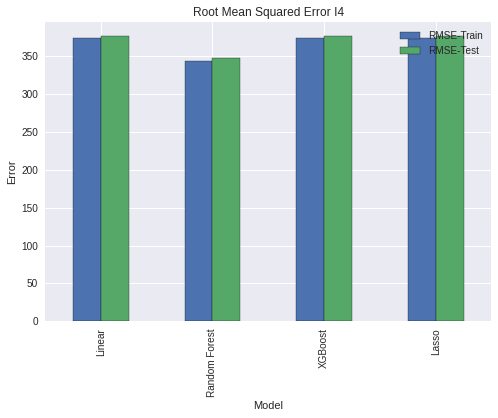

In [84]:
results = results.rename(index={0: 'Linear'})
results = results.rename(index={1: 'Random Forest'})
results = results.rename(index={2: 'XGBoost'})
results = results.rename(index={3: 'Lasso'})
results = results.rename(index={4: 'Polynomial'})

results_RMSE=results[['Model','RMSE-Train','RMSE-Test']]
results_RMSE

plt.style.use("seaborn")
fig_size = (15, 5)
results_RMSE.plot.bar(edgecolor='k')
plt.title("Root Mean Squared Error I4")   
plt.xlabel("Model")
plt.ylabel("Error")   

# R2-Score Graph

Text(0, 0.5, 'Score')

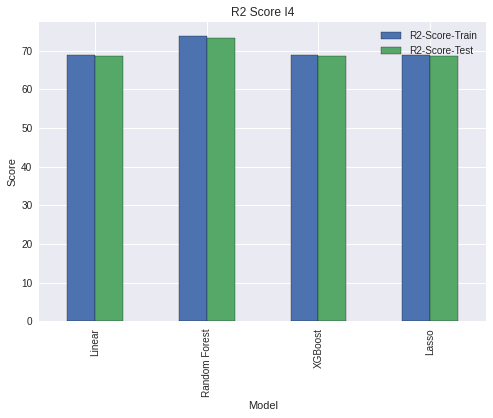

In [85]:
results = results.rename(index={0: 'Linear'})
results = results.rename(index={1: 'Random Forest'})
results = results.rename(index={2: 'XGBoost'})
results = results.rename(index={3: 'Lasso'})
results = results.rename(index={4: 'Polynomial'})

results_R2=results[['Model','R2-Score-Train','R2-Score-Test']]
results_R2

plt.style.use("seaborn")
fig_size = (15, 5)
results_R2.plot.bar(edgecolor='k')
plt.title("R2 Score I4")   
plt.xlabel("Model")
plt.ylabel("Score")   

# Combine Graph

Text(0, 0.5, 'Value')

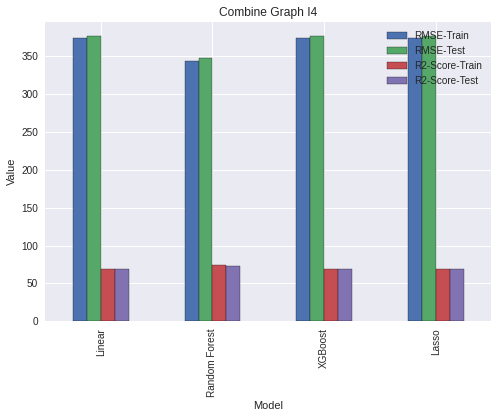

In [86]:
results = results.rename(index={0: 'Linear'})
results = results.rename(index={1: 'Random Forest'})
results = results.rename(index={2: 'XGBoost'})
results = results.rename(index={3: 'Lasso'})
results = results.rename(index={4: 'Polynomial'})

plt.style.use("seaborn")
fig_size = (15, 5)
results.plot.bar(edgecolor='k')
plt.title("Combine Graph I4")   
plt.xlabel("Model")
plt.ylabel("Value")   

# Pickel File

In [87]:
results

,Model,RMSE-Train,RMSE-Test,R2-Score-Train,R2-Score-Test
Linear,Linear,374.434798,376.293358,68.939587,68.702755
Random Forest,XGBoost,344.448798,347.340008,73.715231,73.333709
XGBoost,Lasso,374.435341,376.302979,68.939497,68.701155
Lasso,Polynomial,374.434798,376.293358,68.939587,68.702755


In [88]:
import pickle
def dumpModel(model):
    print(model_name)
    with open('best_model_pickle.pkl','wb') as file:
          pickle.dump(model,file)

In [89]:
model_name=results['RMSE-Train'].idxmin()
model_name

'Random Forest'

In [90]:
if model_name=='Linear':
   dumpModel(linear_reg.fit(X, Y))
elif model_name=='Random Forest':
   dumpModel(rforest.fit(X, Y))
elif model_name=='XGBoost':
   dumpModel(xg_reg.fit(X, Y))
elif model_name=='Lasso':
   dumpModel(lasso_m.fit(X, Y))
elif model_name=='Polynomial':
   dumpModel(pol_reg.fit(X, Y))

Random Forest
